In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

In [2]:
def mask(df, key, value):
    return df[df[key] <= value]
pd.DataFrame.mask = mask

In [7]:
class plotD2DIS:
    def __init__(self, name):
        self.name = name
        self.material = 'deuterium'
        self.E = 10.602
        if(self.name=="deuterium_F1F220"):
            self.A = 2
            self.Z = 1
            self.sym = "D"
            self.doIso = False
            self.model = "F1F220"
            self.coefs = []
        elif(self.name=="deuterium_F1F221"):
            self.A = 2
            self.Z = 1
            self.sym = "D"
            self.doIso = False
            self.model = "F1F221"
            self.coefs = []
        elif(self.name=="deuterium_XEM20"):
            self.A = 2
            self.Z = 1
            self.sym = "D"
            self.doIso = False
            self.model = "XEM"
            self.coefs = []
        elif(self.name=="deuterium_XEM21"):
            self.A = 2
            self.Z = 1
            self.sym = "D"
            self.doIso = False
            self.model = "XEM"
            self.coefs = []
        else:
            print("Error initializing Class! Unknown File Name.")
        self.read_df()
            
    def get_material(self):
        print(self.material)
    
    def read_df(self):
        if(self.model=="XEM"):
            self.df = pd.read_csv('../output/emcFit3/%s_avg.out' % self.name, delim_whitespace =True,names=['Y','A','Z','th','Ep','x_bj','sigIN_xem20','sigQE_xem20'], \
                    dtype={'Y':np.float64,'A':np.float64,'Z':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64, \
                        'sigIN_xem':np.float64, 'sigQE_xem20':np.float64,'sigIN_xem20':np.float64})
            self.df['sigInXEM20'] = self.df['sigIN_xem20'] / 1000.
            self.df['sigQEXEM20'] = self.df['sigQE_xem20'] * 1000.
            self.df['sig_tot'] = self.df['sigInXEM20'] + self.df['sigQEXEM20']
            self.df['slacFit'] = self.emc_slac_fit(self.df['x_bj'].to_numpy(),self.A)
        elif(self.model=="F1F220"):
            self.df = pd.read_csv('../output/emcFit3/%s.out' % self.name, delim_whitespace =True,names=['Y','A','Z','th','Ep','x_bj','sigIN_f1f220','sigQE_f1f220'], \
                    dtype={'Y':np.float64,'A':np.float64,'Z':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64, \
                        'sigIN_xem':np.float64, 'sigQE_f1f220':np.float64,'sigIN_f1f220':np.float64})
            self.df['sigInF1F220'] = self.df['sigIN_f1f220'] / 1000.
            self.df['sigQEF1F220'] = self.df['sigQE_f1f220'] / 1000.
            self.df['sig_tot'] = self.df['sigInF1F220'] + self.df['sigQEF1F220']
            self.df['slacFit'] = self.emc_slac_fit(self.df['x_bj'].to_numpy(),self.A)
        elif(self.model=="F1F221"):
            self.df = pd.read_csv('../output/emcFit3/%s.out' % self.name, delim_whitespace =True,names=['Y','A','Z','th','Ep','x_bj','sigIN_f1f221','sigQE_f1f221'], \
                    dtype={'Y':np.float64,'A':np.float64,'Z':np.float64,'th':np.float64,'Ep':np.float64,'x_bj':np.float64, \
                        'sigIN_xem':np.float64, 'sigQE_f1f221':np.float64,'sigIN_f1f221':np.float64})
            self.df['sigInF1F221'] = self.df['sigIN_f1f221'] / 1000.
            self.df['sigQEF1F221'] = self.df['sigQE_f1f221'] / 1000.
            self.df['sig_tot'] = self.df['sigInF1F221'] + self.df['sigQEF1F221']
            self.df['slacFit'] = self.emc_slac_fit(self.df['x_bj'].to_numpy(),self.A)
        else:
            print("Error initializing Class! Unknown Model.")

    def emc_slac_fit(self, x, A) :
        alpha = -0.070 + 2.189*x - 24.667*x**2 + 145.291*x**3 - 497.237*x**4 + 1013.129*x**5 - 1208.393*x**6 + 775.767*x**7 - 205.872*x**8
        C = np.exp(0.017 + 0.018*np.log(x) + 0.005*(np.log(x))**2)
        return C*A**alpha

    def plot_dis(self):
        fig2, ax2 = plt.subplots(1,1,figsize=(15, 1*7))
        self.read_df()
        ax2.set_title(self.name)
        if(self.model=="XEM"):
            self.df.plot.scatter('x_bj','sigInXEM20',xlim=(0.2,0.9),ax=ax2)
        elif(self.model=="F1F220"):
            self.df.plot.scatter('x_bj','sigInF1F220',xlim=(0.2,0.9),ax=ax2)
        elif(self.model=="F1F221"):
            self.df.plot.scatter('x_bj','sigInF1F221',xlim=(0.2,0.9),ax=ax2)
        else:
            print("Error Plotting DIS! Unknown Model.")
    
    def plot_cs(self):
        fig2, ax2 = plt.subplots(1,1,figsize=(15, 1*7))
        self.read_df()
        ax2.set_title(self.name)
        self.df.plot.scatter('x_bj','sig_tot',xlim=(0.2,1.2),ax=ax2,logy=True)
        
    def plot_dis_ratio(self, plotD2DIS):
        fig1, ax1 = plt.subplots(1,1,figsize=(15, 1*7))
        self.read_df()
        ax1.set_title(self.name)
        if(self.model=="XEM" and plotD2DIS.model=="F1F220"):
            self.df['ratio'] = (self.df['sigInXEM20'] / self.A) / (plotD2DIS.get_col('sigInF1F220') / plotD2DIS.get_A())
            self.df.plot.scatter('x_bj','ratio',color='blue',xlim=(0.2,1.05),ylim=(0.8,1.2),ax=ax1,label='No IsoScaler Correction')
            #self.df.plot('x_bj','slacFit',xlim=(0.2,0.98),ylim=(0.85,1.15),ax=ax1)
            ax1.set_ylabel(r'$%s_{%s}/ %d   /   D_{%s} / %d' % (self.sym, self.model, self.A, plotD2DIS.model, plotD2DIS.get_A()))
            ax1.set_xlabel(r'X')
        elif(self.model=="XEM" and plotD2DIS.model=="F1F221"):
            self.df['ratio'] = (self.df['sig_tot'] / self.A) / (plotD2DIS.get_col('sig_tot') / plotD2DIS.get_A())
            self.df.plot.scatter('x_bj','ratio',color='blue',xlim=(0.2,1.05),ylim=(0.8,1.2),ax=ax1,label='No IsoScaler Correction')
            #self.df.plot('x_bj','slacFit',xlim=(0.2,0.98),ylim=(0.85,1.15),ax=ax1)
            ax1.set_ylabel(r'$%s_{%s}/ %d   /   D_{%s} / %d' % (self.sym, self.model, self.A, plotD2DIS.model, plotD2DIS.get_A()))
            ax1.set_xlabel(r'X')
        elif(self.model=="F1F220" and plotD2DIS.model=="XEM"):
            self.df['ratio'] = (self.df['sigInF1F220'] / self.A) / (plotD2DIS.get_col('sigInXEM20') / plotD2DIS.get_A())
            self.df.plot.scatter('x_bj','ratio',color='blue',xlim=(0.2,2.05),ylim=(0.8,1.4),ax=ax1,label='No IsoScaler Correction')
            #self.df.plot('x_bj','slacFit',xlim=(0.2,0.98),ylim=(0.85,1.15),ax=ax1)
            ax1.set_ylabel(r'$%s_{%s}/ %d   /   D_{%s} / %d' % (self.sym, self.model, self.A, plotD2DIS.model, plotD2DIS.get_A()))
            ax1.set_xlabel(r'X')
        elif(self.model=="F1F221" and plotD2DIS.model=="XEM"):
            self.df['ratio'] = (self.df['sigInF1F221'] / self.A) / (plotD2DIS.get_col('sigInXEM20') / plotD2DIS.get_A())
            self.df.plot.scatter('x_bj','ratio',color='blue',xlim=(0.2,2.05),ylim=(0.8,1.4),ax=ax1,label='No IsoScaler Correction')
            #self.df.plot('x_bj','slacFit',xlim=(0.2,0.98),ylim=(0.85,1.15),ax=ax1)
            ax1.set_ylabel(r'$%s_{%s}/ %d   /   D_{%s} / %d' % (self.sym, self.model, self.A, plotD2DIS.model, plotD2DIS.get_A()))
            ax1.set_xlabel(r'X')
        else:
            print("Error Plotting DIS! Must divide XEM by F1F220.")

    def get_poly_fit(self):
        self.coefs = poly.polyfit(self.df['x_bj'].to_numpy()[0:36],self.df['ratio'].to_numpy()[0:36],5)
#emc = 0.92170 +1.7544*xtmp -3.7324*xtmp**2 - 0.24293*xtmp**3 + 6.7613*xtmp**4 - 4.6089*xtmp**5
        print("           emc = %7.5f + %7.5f*xtmp + %7.5f*xtmp**2 + \n	1        %7.5f*xtmp**3 + %7.5f*xtmp**4 + %7.5f*xtmp**5" % (self.coefs[0],
                                                                        self.coefs[1],self.coefs[2],self.coefs[3],self.coefs[4], self.coefs[5]))
    
    def plot_dis_fit(self):
        self.fitRange = []
        self.fitX = []
        self.df['ratioFit'] = self.coefs[0] + self.df['x_bj']*self.coefs[1] + self.coefs[2]*self.df['x_bj']**2 + self.coefs[3]*self.df['x_bj']**3 + self.coefs[4]*self.df['x_bj']**4 + \
                self.coefs[5]*self.df['x_bj']**5
        fig1, ax1 = plt.subplots(1,1,figsize=(15, 1*7))
        ax1.set_title(self.name)
        fitRange = self.df['ratioFit'].to_numpy()[0:36]
        fitX = self.df['x_bj'].to_numpy()[0:36]
        plt.plot(fitX, fitRange,color='green',label='Ratio Fit')
        self.df.plot.scatter('x_bj','ratio',color='blue',xlim=(0.2,1.0),ylim=(0.8,1.2),ax=ax1,label='No IsoScaler Correction')
        ax1.set_ylabel(r'Ratio FIT')
        ax1.set_xlabel(r'X')
    
    def get_col(self,column):
        return self.df[column].to_numpy()
    def get_A(self):
        return self.A
    def get_Z(self):
        return self.Z
    def get_doIso(self):
        print(self.doIso)


           emc = 0.98835 + 0.15439*xtmp + -0.34950*xtmp**2 + 
	1        0.34427*xtmp**3 + -0.02874*xtmp**4 + -0.04936*xtmp**5


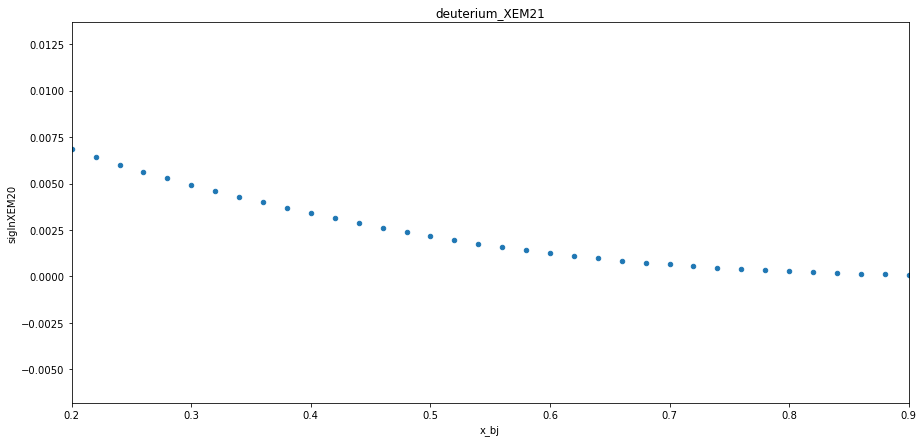

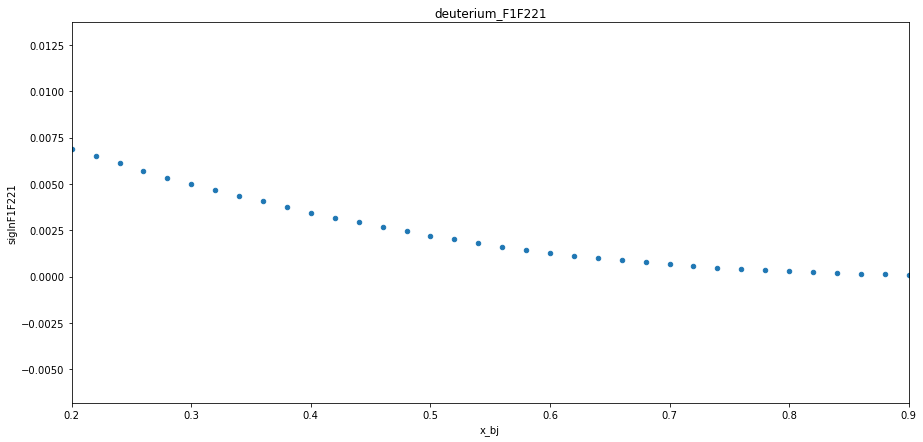

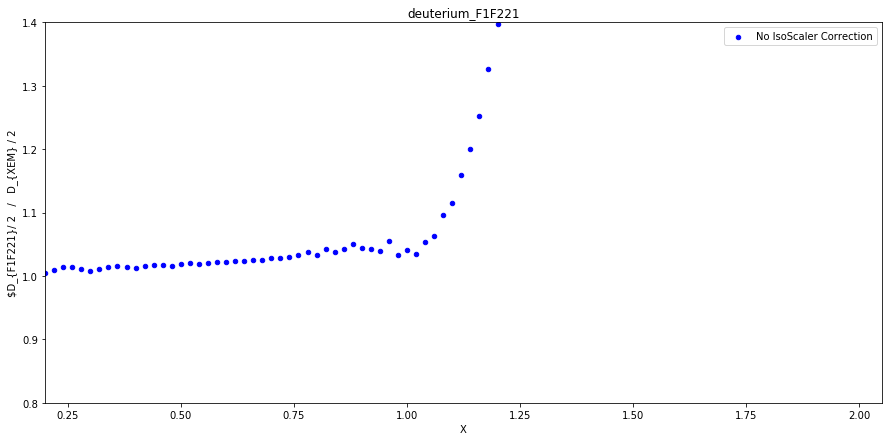

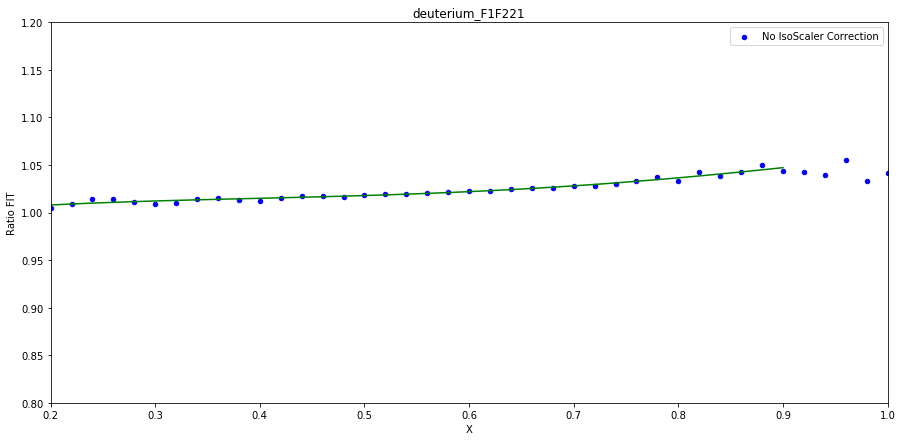

In [4]:
deutXEM = plotD2DIS("deuterium_XEM21")
deutF1F221 = plotD2DIS("deuterium_F1F221")

deutXEM.plot_dis()
deutF1F221.plot_dis()
#deutXEM.plot_dis_ratio(deutF1F220)
deutF1F221.plot_dis_ratio(deutXEM)

#deutXEM.get_poly_fit()
deutF1F221.get_poly_fit()

deutF1F221.plot_dis_fit()

           emc = 0.73991 + 3.18408*xtmp + -14.61695*xtmp**2 + 
	1        31.58879*xtmp**3 + -32.32550*xtmp**4 + 12.60774*xtmp**5


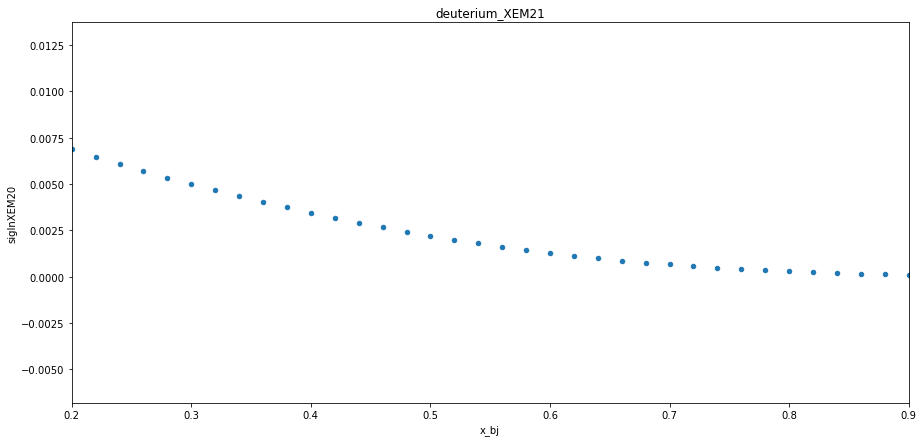

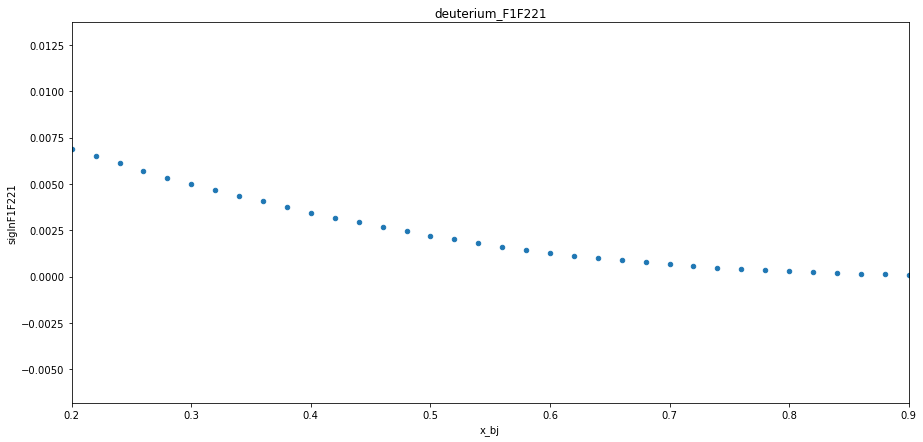

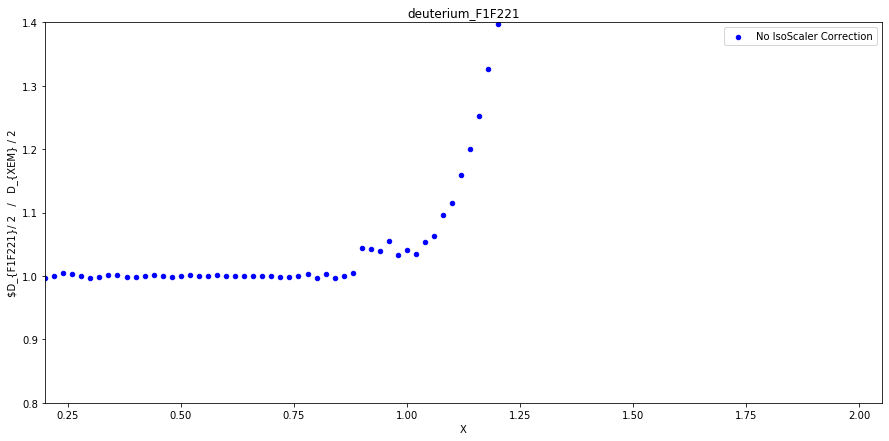

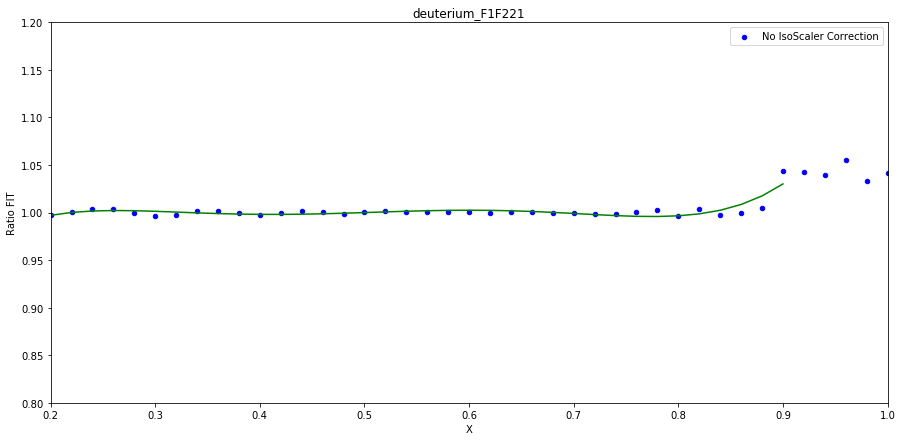

In [6]:
deutXEM_fit = plotD2DIS("deuterium_XEM21")
deutF1F221_fit = plotD2DIS("deuterium_F1F221")

deutXEM_fit.plot_dis()
deutF1F221_fit.plot_dis()
#deutXEM.plot_dis_ratio(deutF1F220)
deutF1F221_fit.plot_dis_ratio(deutXEM_fit)

#deutXEM.get_poly_fit()
deutF1F221_fit.get_poly_fit()

deutF1F221_fit.plot_dis_fit()

           emc = 0.88015 + 1.53478*xtmp + -7.42377*xtmp**2 + 
	1        17.00903*xtmp**3 + -18.54377*xtmp**4 + 7.73466*xtmp**5


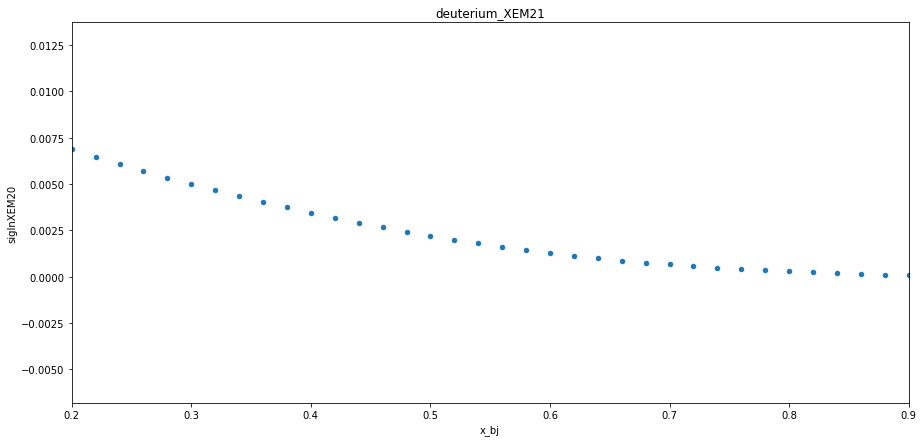

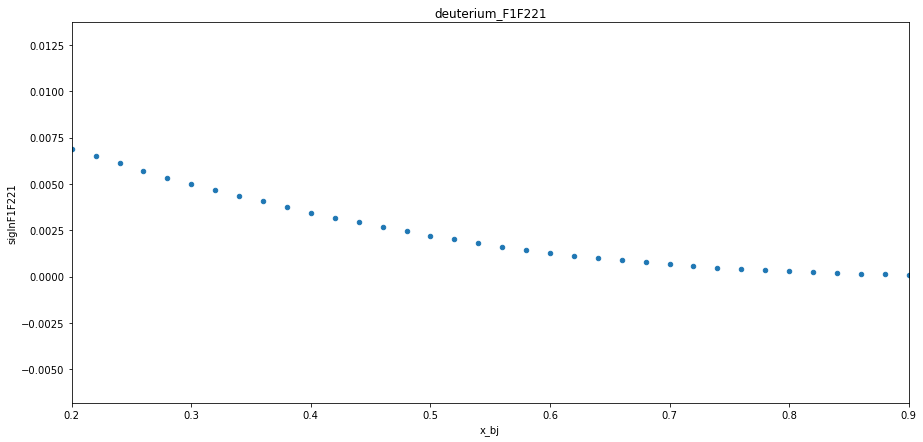

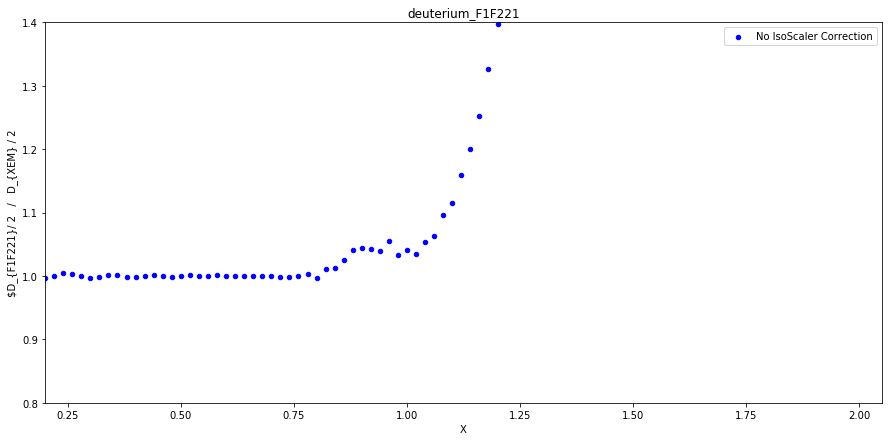

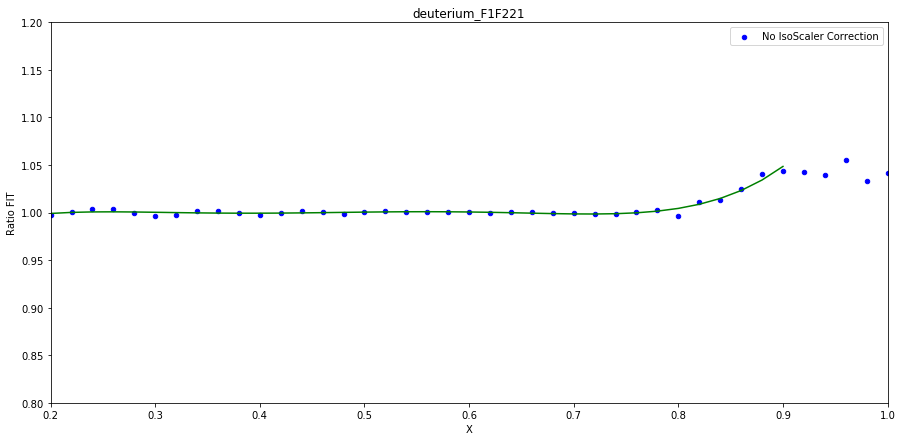

In [9]:
deutXEM_avg = plotD2DIS("deuterium_XEM21")
deutF1F221_avg = plotD2DIS("deuterium_F1F221")

deutXEM_avg.plot_dis()
deutF1F221_avg.plot_dis()
#deutXEM.plot_dis_ratio(deutF1F220)
deutF1F221_avg.plot_dis_ratio(deutXEM_avg)

#deutXEM.get_poly_avg()
deutF1F221_avg.get_poly_fit()

deutF1F221_avg.plot_dis_fit()